In [26]:
# import pulp
# import pandas as pd
# # from pylab import *
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# np.random.seed(1)
# import os

# styles = ["A","B","C"]
# colors= ["R", "B", "G"]
# shops = ["1","2","3"]
# bundles = [str(i+1) for i in range(13)]


# bundles_static={
#     "1":{"AR":1,"AB":1,"AG":1,"BR":1,"BB":1,"BG":1,"CR":1,"CB":1,"CG":1},
#     "2":{"AR":3,"AB":3,"AG":3,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
#     "3":{"AR":0,"AB":0,"AG":0,"BR":3,"BB":3,"BG":3,"CR":0,"CB":0,"CG":0},
#     "4":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":3,"CB":3,"CG":3},
#     "5":{"AR":1,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
#     "6":{"AR":0,"AB":1,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
#     "7":{"AR":0,"AB":0,"AG":1,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
#     "8":{"AR":0,"AB":0,"AG":0,"BR":1,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
#     "9":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":1,"BG":0,"CR":0,"CB":0,"CG":0},
#     "10":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":1,"CR":0,"CB":0,"CG":0},
#     "11":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":1,"CB":0,"CG":0},
#     "12":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":1,"CG":0},
#     "13":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":1}
# }


# budget = 1000
# bundle_cost = 10
# desired_allocation = 40

# # bundle_availability = {"1":10,"2":10,"3":10,"4":60}
# bundle_availability = {str(i+1):np.random.randint(5,20) for i in range(13)}


# inventory_diff = []
# current_inventory = {}
# for i,shop in enumerate(shops):
#     current_inventory[shop] = {}
#     for style in styles:
#         for color in colors:
#             current_inventory[shop][style+color] = np.random.randint(0,10)
#             for i in range(-50,50):
#                 inventory_diff.append((shop,style+color,i))


# bundle_allocation = []
# #bundle k1
# for k1 in bundles_static.keys():
#     #shop+color k2
#     for k2 in bundles_static[k1].keys():
#         bundle_allocation.append((k1,k2))
        
# inventory_allocation = []
# for shop in shops:
#     for bundle in bundles:
#         inventory_allocation.append((shop,bundle))


# p_b_var = pulp.LpVariable.dicts('bundle_gather', bundles,lowBound=0, cat="Integer")
# p_ba_var = pulp.LpVariable.dicts('bundle_alloc', bundle_allocation,lowBound=0, cat="Integer")
# p_id_var = pulp.LpVariable.dicts('inventory_diff', inventory_diff, cat="Binary")
# p_ia_var = pulp.LpVariable.dicts('inventory_alloc', inventory_allocation,lowBound=0, cat="Integer")

# model = pulp.LpProblem("opt_inventory", pulp.LpMaximize)

# cost_obj = pulp.lpSum(p_b_var)

# cost_obj

# model+=cost_obj

# for bundle in bundles:
#     model+=bundle_availability[bundle]-p_b_var[bundle] >= 0
           

# for shop in shops:
#     for style in styles:
#         for color in colors:
#             constr=[]
#             for i in range(-50,50):
#                 constr.append(p_id_var[(shop,style+color,i)])
#             model += pulp.lpSum(constr)==1

# for bundle in bundles_static:
    
#     for style in styles:
#         for color in colors:
#             #constraint on bundle and allocation
#             model += p_b_var[bundle]*bundles_static[bundle][style+color]==p_ba_var[bundle,style+color]
    
#     ia_constr = []        
#     for shop in shops:         
#         ia_constr.append(p_ia_var[shop,bundle])
#     #make sure that the all distributor bundles are sent to shops
#     model += p_b_var[bundle]==pulp.lpSum(ia_constr)


# #efficiency of allocation
# allocation_eff = []
# for shop in shops:
#     for style in styles:
#         for color in colors:
#             sc_units = current_inventory[shop][style+color]
#             for bundle in bundles:
#                 sc_units += p_ia_var[(shop,bundle)]*bundles_static[bundle][style+color] 
            
#             #allocated bundles*number of shirts in bundle_id for each style color
#             loss = sc_units - desired_allocation
#             #ensure it does not go over the desired allocation
#             model+= loss <= 49
#             model+= loss >= -50

#             allocation_eff.append(loss)
            
            
#             id_var_constr = []
#             for i in range(-50,50):
#                 id_var_constr.append(p_id_var[(shop,style+color,i)]*i)
            
#             model+=pulp.lpSum(id_var_constr)==loss
        
# non_lin = [np.sqrt(i**2) for i in range(-50,50)]


# custom_alloc_eff = []
# i=0
# for shop in shops:
#     for style in styles:
#         for color in colors:
#             new_loss = 0
#             for j in range(-50,50):
#                 new_loss+=p_id_var[(shop,style+color,j)]*non_lin[j]
#             custom_alloc_eff.append(new_loss)
#             i+=1

# allocation_obj = pulp.lpSum(custom_alloc_eff)

# model+=allocation_obj

# solution = model.solve()

# print("The Objective Value", pulp.value(model.objective))



# diff_inventory_df = pd.DataFrame(columns=('shop_id','style','color','diff','loss'))
# j=0
# for shop in shops:
#     for style in styles:
#         for color in colors:
#             for i in range(-50,50):
#                 if p_id_var[shop,style+color,i].value()>0:
#                     diff_inventory_df.loc[j]=[shop,style,color,p_id_var[shop,style+color,i].value(),i]
#                     j+=1
                
# diff_inventory_df      

# current_inventory_df = pd.DataFrame(columns=('shop_id','style','color','sc_units'))
# updated_inventory_df = pd.DataFrame(columns=('shop_id','style','color','sc_units'))

# i=0
# for shop in shops:
#     for style in styles:
#         for color in colors:
#             sc_units = current_inventory[shop][style+color]
#             current_inventory_df.loc[i]=[shop,style,color,sc_units]
            
#             for bundle in bundles:
#                 sc_units += p_ia_var[shop,bundle].value()*bundles_static[bundle][style+color] 
                    
#             updated_inventory_df.loc[i]=[shop,style,color,sc_units]
#             i+=1

# shop_bundle_proba_df = pd.DataFrame(columns=('shop_id','bundle_id','proba'))
# shop_bundle_df = pd.DataFrame(columns=('shop_id','bundle_id','bundle_units'))

# i=0
# for shop in shops:
#     for bundle in bundles:
#         shop_bundle_df.loc[i] = [shop,bundle,p_ia_var[shop, bundle].value()]
#         shop_bundle_proba_df.loc[i] = [shop,bundle,np.random.uniform(0,1)]
#         i+=1

# alloc_bundle_df = pd.DataFrame(columns=('bundle_id','alloc_bundles'))
# i=0
# for bundle in bundles:

#     alloc_bundle_df.loc[i] = [bundle,p_b_var[bundle].value()]
#     i+=1

# avail_bundle_df = pd.DataFrame(columns=('bundle_id','avail_bundles'))
# i=0
# for bundle in bundles:

#     avail_bundle_df.loc[i] = [bundle,bundle_availability[bundle]]
#     i+=1

In [27]:
# bundle_lookup_df = pd.DataFrame(bundles_static).T

In [28]:

# avail_bundle_vec = avail_bundle_df['avail_bundles'].values
# avail_bundle_vec

In [29]:
# inventory_vec = current_inventory_df['sc_units'].values

# inventory_vec

In [10]:
import pulp
import pandas as pd
# from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
import os

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


    # Disable all GPUS
tf.config.set_visible_devices([], 'GPU')
visible_devices = tf.config.get_visible_devices()
visible_devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [12]:


class OptBlock(tf.keras.Model):
    def __init__(self,seed=1, use_mip_solver=True, shuffle_bundles=False):
        super(OptBlock,self).__init__(name='')


        np.random.seed(seed)
        self.styles = ["A","B","C"]
        self.colors= ["R", "B", "G"]
        self.shops = ["1","2","3"]
        self.bundles = [str(i+1) for i in range(13)]
        
        self.bundles_static={
            "1":{"AR":1,"AB":1,"AG":1,"BR":1,"BB":1,"BG":1,"CR":1,"CB":1,"CG":1},
            "2":{"AR":3,"AB":3,"AG":3,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
            "3":{"AR":0,"AB":0,"AG":0,"BR":3,"BB":3,"BG":3,"CR":0,"CB":0,"CG":0},
            "4":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":3,"CB":3,"CG":3},
            "5":{"AR":1,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
            "6":{"AR":0,"AB":1,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
            "7":{"AR":0,"AB":0,"AG":1,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
            "8":{"AR":0,"AB":0,"AG":0,"BR":1,"BB":0,"BG":0,"CR":0,"CB":0,"CG":0},
            "9":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":1,"BG":0,"CR":0,"CB":0,"CG":0},
            "10":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":1,"CR":0,"CB":0,"CG":0},
            "11":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":1,"CB":0,"CG":0},
            "12":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":1,"CG":0},
            "13":{"AR":0,"AB":0,"AG":0,"BR":0,"BB":0,"BG":0,"CR":0,"CB":0,"CG":1}
        }

        
        if shuffle_bundles==True:
            keys = list(self.bundles_static.keys())
            np.random.shuffle(keys)
            self.bundles_static = {str(i+1):self.bundles_static[key] for i,key in enumerate(keys)}
            
            
        for i in range(13):
#             self.bundles_static[str(i+1)]={}
            for style in self.styles:
                for color in self.colors:
                    self.bundles_static[str(i+1)][style+color] = max(0,self.bundles_static[str(i+1)][style+color]+np.random.randint(-1,2))
        

        # bundle_availability = {"1":10,"2":10,"3":10,"4":60}
        self.bundle_availability = {str(i+1):np.random.randint(5,20) for i in range(13)}


        self.inventory_diff = []
        self.current_inventory = {}
        self.desired_allocation = {}
        for i,shop in enumerate(self.shops):
            self.current_inventory[shop] = {}
            self.desired_allocation[shop] = {}
            for style in self.styles:
                for color in self.colors:
                    self.current_inventory[shop][style+color] = np.random.randint(0,10)
                    self.desired_allocation[shop][style+color] = self.current_inventory[shop][style+color]+np.random.randint(0,60)
                    for i in range(-50,50):
                        self.inventory_diff.append((shop,style+color,i))


        self.bundle_allocation = []
        #bundle k1
        for k1 in self.bundles_static.keys():
            #shop+color k2
            for k2 in self.bundles_static[k1].keys():
                self.bundle_allocation.append((k1,k2))

        self.inventory_allocation = []
        for shop in self.shops:
            for bundle in self.bundles:
                self.inventory_allocation.append((shop,bundle))
        

#         diff_inventory_df = pd.DataFrame(columns=('shop_id','style','color','diff','loss'))
#         j=0
#         for shop in shops:
#             for style in styles:
#                 for color in colors:
#                     for i in range(-50,50):
#                         if p_id_var[shop,style+color,i].value()>0:
#                             diff_inventory_df.loc[j]=[shop,style,color,p_id_var[shop,style+color,i].value(),i]
#                             j+=1
        if use_mip_solver==True:
            self.run_mip()
        self.create_tf_vars(from_mip_sol=use_mip_solver)

    def create_tf_vars(self,from_mip_sol=True):
        self.tf_cur_inven = {}
        self.mip_upd_inven = {}
        self.tf_des_alloc = {}
        self.target = []
        
        for shop in self.shops:
            self.tf_cur_inven[shop] = {}
            self.mip_upd_inven[shop] = {}
            self.tf_des_alloc[shop] = {}
            for style in self.styles:
                for color in self.colors:
                    sc_units = self.current_inventory[shop][style+color]
                    self.tf_cur_inven[shop][style+color] = tf.cast(self.current_inventory[shop][style+color],tf.float32)
                    self.tf_des_alloc[shop][style+color] = tf.cast(self.desired_allocation[shop][style+color],tf.float32)
                    if from_mip_sol==True:
                        for bundle in self.bundles:
                            sc_units += self.p_ia_var[shop,bundle].value()*self.bundles_static[bundle][style+color] 

                        self.mip_upd_inven[shop][style+color] = tf.cast(sc_units,tf.float32)
                        self.target.append([self.mip_upd_inven[shop][style+color]])
                    else:
                        self.target.append([self.tf_des_alloc[shop][style+color]])
                
        self.target = tf.reshape(tf.concat(self.target,axis=0),[1,-1])

        self.tf_proba = {}
        self.mip_shop_bundle = {}
        self.tf_alloc_shp_bun = {}
        i=0
        for shop in self.shops:
            for bundle in self.bundles:
                self.tf_proba[(shop,bundle)] = tf.cast(0.0,tf.float32)
                self.tf_alloc_shp_bun[(shop,bundle)] = tf.cast(0.0,tf.float32)
                if from_mip_sol==True:
                    self.mip_shop_bundle[(shop,bundle)] = tf.cast(self.p_ia_var[shop, bundle].value(),tf.float32)



        self.mip_alloc_bundle = {}                
        self.tf_alloc_bundle = {}
        self.tf_avail_bundle = {}
        
        for bundle in self.bundles:
            if from_mip_sol==True:
                self.mip_alloc_bundle[bundle] = tf.cast(self.p_b_var[bundle].value(),tf.float32)
            self.tf_alloc_bundle[bundle] = tf.cast(0.0,tf.float32)
            self.tf_avail_bundle[bundle] =  tf.cast(self.bundle_availability[bundle],tf.float32)
        
        self.tf_bun_sty_col = {}
        for bundle in self.bundles:
            self.tf_bun_sty_col[bundle] = {}
            for style in self.styles:
                for color in self.colors:
                    self.tf_bun_sty_col[bundle][style+color] = tf.cast(self.bundles_static[bundle][style+color],tf.float32)
                
    def run_mip(self):

        self.p_b_var = pulp.LpVariable.dicts('bundle_gather', self.bundles,lowBound=0, cat="Integer")
        self.p_ba_var = pulp.LpVariable.dicts('bundle_alloc', self.bundle_allocation,lowBound=0, cat="Integer")
        self.p_id_var = pulp.LpVariable.dicts('inventory_diff', self.inventory_diff, cat="Binary")
        self.p_ia_var = pulp.LpVariable.dicts('inventory_alloc', self.inventory_allocation,lowBound=0, cat="Integer")

        model = pulp.LpProblem("opt_inventory", pulp.LpMaximize)

        cost_obj = pulp.lpSum(self.p_b_var)

        cost_obj

        model+=cost_obj
        
        for bundle in self.bundles:
            model+=self.bundle_availability[bundle]-self.p_b_var[bundle] >= 0


        for shop in self.shops:
            for style in self.styles:
                for color in self.colors:
                    constr=[]
                    for i in range(-50,50):
                        constr.append(self.p_id_var[(shop,style+color,i)])
                    model += pulp.lpSum(constr)==1

        for bundle in self.bundles_static:

            for style in self.styles:
                for color in self.colors:
                    #constraint on bundle and allocation
                    model += self.p_b_var[bundle]*self.bundles_static[bundle][style+color]==self.p_ba_var[bundle,style+color]

            ia_constr = []        
            for shop in self.shops:         
                ia_constr.append(self.p_ia_var[shop,bundle])
            #make sure that the all distributor bundles are sent to shops
            model += self.p_b_var[bundle]==pulp.lpSum(ia_constr)


        #efficiency of allocation
        allocation_eff = []
        for shop in self.shops:
            for style in self.styles:
                for color in self.colors:
                    sc_units = self.current_inventory[shop][style+color]
                    for bundle in self.bundles:
                        sc_units += self.p_ia_var[(shop,bundle)]*self.bundles_static[bundle][style+color] 

                    #allocated bundles*number of shirts in bundle_id for each style color
                    loss = sc_units - self.desired_allocation[shop][style+color]
                    #ensure it does not go over the desired allocation
                    model+= loss <= 49
                    model+= loss >= -50

                    allocation_eff.append(loss)


                    id_var_constr = []
                    for i in range(-50,50):
                        id_var_constr.append(self.p_id_var[(shop,style+color,i)]*i)

                    model+=pulp.lpSum(id_var_constr)==loss

        non_lin = [np.sqrt(i**2) for i in range(-50,50)]


        custom_alloc_eff = []
        i=0
        for shop in self.shops:
            for style in self.styles:
                for color in self.colors:
                    new_loss = 0
                    for j in range(-50,50):
                        new_loss+=self.p_id_var[(shop,style+color,j)]*non_lin[j]
                    custom_alloc_eff.append(new_loss)
                    i+=1

        allocation_obj = pulp.lpSum(custom_alloc_eff)

        model+=allocation_obj

        solution = model.solve()

        print("The Objective Value", pulp.value(model.objective))
        

    def call(self,proba,training=False):
        
        next_inven = {}
        for shop in self.shops:
            next_inven[shop] = {}
            for style in self.styles:
                for color in self.colors:
                    next_inven[shop][style+color] = self.tf_cur_inven[shop][style+color]
                
#         tot_proba = {}
#         tot_bundle_alloc = {}
#         amt_avail = {}

#         for bundle in self.bundles:
#             amt_avail[bundle] = 0
#             tot_bundle_alloc[bundle] = 0
#             tot_proba[bundle] = 0
            
#         i=0
#         for shop in self.shops:
#             for bundle in self.bundles:
#                 tot_bundle_alloc[bundle] += self.tf_alloc_shp_bun[(shop,bundle)]
#                 tot_proba[bundle] += proba[i]
#                 i+=1   
                
#         for bundle in self.bundles:         
#             amt_avail[bundle] = (self.tf_avail_bundle[bundle]-tot_bundle_alloc[bundle]-tot_proba[bundle])
#             print('amt available')
#             print(bundle,amt_avail[bundle].numpy(),tot_inven[bundle].numpy(),self.avail_bundle[bundle].numpy())
            
        new_proba = []
        i=0
        for shop in self.shops:
            for bundle in self.bundles:
#                 if amt_avail[bundle]>tot_proba[bundle] and amt_avail[bundle]>0:
                new_proba.append([proba[i]])
#                 if amt_avail[bundle]>0:
#                     new_proba.append([proba[i]])
#                 else:
#                     new_proba.append([proba[i]*tf.cast(0.0,tf.float32)])
                i+=1
                
        new_proba = tf.reshape(tf.concat(new_proba,axis=0),[-1,1])
        
        result_dict = {}
        
        i=0
        for shop in self.shops:
            result_dict[shop] = {}
            for bundle in self.bundles:
                for style in self.styles:
                    for color in self.colors:
                        
                        
                        next_inven[shop][style+color] += self.tf_bun_sty_col[bundle][style+color]*proba[i]
                        
                        result_dict[shop][style+color] = next_inven[shop][style+color]
                        
                i+=1

        result = [] 
        for shop in self.shops:
            for style in self.styles:
                for color in self.colors:
                    result.append([next_inven[shop][style+color]])
                    
        result = tf.reshape(tf.concat(result,axis=0),[1,-1])
        
        if training==True:
            for shop in self.shops:
                for style in self.styles:
                    for color in self.colors:
                        self.tf_cur_inven[shop][style+color] = next_inven[shop][style+color]
            i=0
            for shop in self.shops:
                for bundle in self.bundles:
                    self.tf_avail_bundle[bundle] -= proba[i]
                    self.tf_alloc_bundle[bundle] += proba[i]
                    self.tf_alloc_shp_bun[(shop,bundle)] += proba[i] 
                    self.tf_proba[(shop,bundle)] = proba[i]
                    i+=1
                    
#             for bundle in self.bundles:
#                 if self.tf_alloc_bundle[bundle]<0:
#                     print(self.tf_alloc_bundle[bundle])
#                 self.tf_avail_bundle[bundle] = tf.math.maximum(0,self.tf_avail_bundle[bundle])
#                 self.tf_alloc_bundle[bundle] = tf.math.maximum(0,self.tf_alloc_bundle[bundle])
                
        return result
    
    def get_bun_sku(self):
        bun_lkup = []
        for bundle in self.bundles:
            for style in self.styles:
                for color in self.colors:
                    bun_lkup.append([self.tf_bun_sty_col[bundle][style+color]])
        bun_lkup = tf.reshape(tf.concat(bun_lkup,axis=0),[1,-1])
        return bun_lkup

    def set_bun_sku(self,x):
        x = tf.squeeze(x)
        i=0
        for bundle in self.bundles:
            for style in self.styles:
                for color in self.colors:
                    self.tf_bun_sty_col[bundle][style+color] = x[i]
                    i+=1
        return

    def get_ava_bun(self):
        ava_bun = []
        for bundle in self.bundles:
            ava_bun.append([self.tf_avail_bundle[bundle]])
        ava_bun = tf.reshape(tf.concat(ava_bun,axis=0),[1,-1])
        return ava_bun

    def set_ava_bun(self,x):
        x = tf.squeeze(x)
        i=0
        for bundle in self.bundles:
            self.tf_avail_bundle[bundle] = x[i]
            i+=1
        return

    def get_cur_inv(self):
        cur_inventory = []
        for shop in self.shops:
            for style in self.styles:
                for color in self.colors:
                    cur_inventory.append([self.tf_cur_inven[shop][style+color]])
        cur_inventory = tf.reshape(tf.concat(cur_inventory,axis=0),[1,-1])
        return cur_inventory

    def set_cur_inv(self,x):
        x = tf.squeeze(x)
        i=0
        for shop in self.shops:
            for style in self.styles:
                for color in self.colors:
                    self.tf_cur_inven[shop][style+color] = x[i]
                    i+=1
        return

    def get_shop_bun_alloc(self):

        shop_bundle_alloc = []
        for shop in self.shops:
            for bundle in self.bundles:
                shop_bundle_alloc.append([self.tf_alloc_shp_bun[(shop,bundle)]])

        shop_bundle_alloc = tf.reshape(tf.concat(shop_bundle_alloc,axis=0),[1,-1])
        return shop_bundle_alloc

    def set_shop_bun_alloc(self,x):
        x = tf.squeeze(x)
        i=0
        for shop in self.shops:
            for bundle in self.bundles:
                self.tf_alloc_shp_bun[(shop,bundle)] = x[i]
                i+=1
        return

    def get_shop_bun_proba(self):

        shop_proba = []
        for shop in self.shops:
            for bundle in self.bundles:
                shop_proba.append([self.tf_proba[(shop,bundle)]])

        shop_proba = tf.reshape(tf.concat(shop_proba,axis=0),[1,-1])
        return shop_proba

    def set_shop_bun_proba(self,x):
        x = tf.squeeze(x)
        i=0

        for shop in self.shops:
            for bundle in self.bundles:
                self.tf_proba[(shop,bundle)] = x[i]
                i+=1
        return
    
    def get_bun_map(self):

        bun_map = []
        
        for style in self.styles:
            for color in self.colors:
                sc_units = 0
                for bundle in self.bundles:
                    sc_units+=self.tf_avail_bundle[bundle]*self.bundles_static[bundle][style+color]

                bun_map.append([sc_units])

        bun_map = tf.reshape(tf.concat(bun_map,axis=0),[1,-1])
        return bun_map


In [5]:
import pulp
_p_b_var = pulp.LpVariable.dicts('bundle_gather', [1],lowBound=0, cat="Integer")


_p_b_var2 = pulp.LpVariable.dicts('bundle_gather', [1,2],lowBound=0, cat="Integer")

{1: None}

In [4]:
# model.block.avail_bundle

In [5]:

    

def get_states(self):
        bun_lkup = []
        for bundle in self.block.bundles:
            for style in self.block.styles:
                for color in self.block.colors:
                    bun_lkup.append([self.block.tf_bun_sty_col[bundle][style+color]])
        bun_lkup = tf.reshape(tf.concat(bun_lkup,axis=0),[1,-1])
        
        ava_bun = []
        alloc_bun = []
        for bundle in self.block.bundles:
#             assert self.block.bundle_availability[bundle]==self.block.tf_avail_bundle[bundle]+self.block.tf_alloc_bundle[bundle]
            ava_bun.append([self.block.tf_avail_bundle[bundle]])
        ava_bun = tf.reshape(tf.concat(ava_bun,axis=0),[1,-1])
        
        cur_inventory = []
        for shop in self.block.shops:
            for style in self.block.styles:
                for color in self.block.colors:
                    cur_inventory.append([self.block.tf_cur_inven[shop][style+color]])
        cur_inventory = tf.reshape(tf.concat(cur_inventory,axis=0),[1,-1])
        
        shop_bundle_alloc = []
        shop_proba = []
        for shop in self.block.shops:
            for bundle in self.block.bundles:
                shop_proba.append([self.block.tf_proba[(shop,bundle)]])
                shop_bundle_alloc.append([self.block.tf_alloc_shp_bun[(shop,bundle)]])
                
        shop_proba = tf.reshape(tf.concat(shop_proba,axis=0),[1,-1])
        shop_bundle_alloc = tf.reshape(tf.concat(shop_bundle_alloc,axis=0),[1,-1])
        
        return bun_lkup,ava_bun, cur_inventory, shop_bundle_alloc, shop_proba

In [13]:
@tf.function
def sumOfSquareErrors(ytrue,ypred):
    
    loss = tf.reduce_sum(tf.square(ypred - ytrue))
    return loss


@tf.function
def rewardFunction(ytrue,ypred,ylimit):
    
    limit = tf.reshape(tf.cast(tf.reduce_sum(ypred,axis=0)-ylimit>0,tf.float32),[1,-1])
    
    penalty = tf.cast(ypred<0, tf.float32)
    
    pos_reward = tf.clip_by_value(ytrue - ypred,0,1e4)

    neg_reward = tf.clip_by_value(ytrue - ypred,-1e4,0)
    
    ypred_shifted = ypred-tf.math.reduce_min(ypred)
    shape_reward = ytrue - tf.reduce_sum(ytrue)*(ypred_shifted)/tf.reduce_sum(ypred_shifted) 
    
    reward = pos_reward+0.1*pos_reward*penalty+0.5*neg_reward - 10*limit + 0.01*shape_reward
    
    return tf.reshape(reward,[1,-1])

In [14]:
class MIP_NN():
    
    def __init__(self,
                   alpha=0.95):
        
        self.vid_count=0
        self.gamma = 1e-1
        self.alpha = alpha
        
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)
        self.loss_function = sumOfSquareErrors
        self.init_block()

        self.model = self.create_model()
        self.prev_loss = 1e6
        
#         self.model = tf.keras.Sequential([DensityBlock(self._bins_,
#                                                        self.means,
#                                                        self.devs,
#                                                        self.maxs,
#                                                        self.mins,
#                                                        self.widths)])
        
#         self.model.compile(optimizer='adam',loss=sumOfSquareErrors,learning_rate=0.001)

    def init_block(self,use_mip_solver=True,seed=1,shuffle_bundles=False):
        self.prev_loss = 1e6
        self.block = OptBlock(seed=seed,use_mip_solver=use_mip_solver,shuffle_bundles=shuffle_bundles)
        
    def create_model(self):
            
        bun_lkup = self.block.get_bun_sku()
        ava_bun = self.block.get_ava_bun()
        cur_inventory = self.block.get_cur_inv()
        shop_bundle_alloc = self.block.get_shop_bun_alloc()
        shop_bun_proba = self.block.get_shop_bun_proba()
            
        in_bun_lkup = tf.keras.Input(shape=bun_lkup.shape[1])
        in_ava_bund = tf.keras.Input(shape=ava_bun.shape[1])
        in_cur_inven = tf.keras.Input(shape=cur_inventory.shape[1])
        in_shop_bun = tf.keras.Input(shape=shop_bundle_alloc.shape[1])
        in_shop_bun_prob = tf.keras.Input(shape=shop_bun_proba.shape[1])
        
        
#         tmp = tf.reshape(in_cur_inven,[1,len(self.block.shops),len(self.block.styles)*len(self.block.colors)])
#         tmp = tf.transpose(tmp,perm=[0,2,1])
#         tmp = tmp*in_ava_bund
#         print(tmp.shape)
#         tmp = tf.keras.layers.Flatten()(tmp)
        
        N_shops = len(self.block.shops)
        N_bundles = len(self.block.bundles)
        N_style_clors = len(self.block.styles)*len(self.block.colors)
    
        remain_sc = tf.reshape(in_bun_lkup,[1,N_bundles,N_style_clors])
        remain_sc = tf.transpose(remain_sc,perm=[0,2,1])
        remain_sc = remain_sc*in_ava_bund
        remain_sc = tf.keras.layers.Flatten()(remain_sc)
        
        prev_shop_bund = in_shop_bun-in_shop_bun_prob
        
        x_shop_bun = tf.keras.layers.Concatenate()([in_ava_bund,in_shop_bun,prev_shop_bund])
        x_shop_bun = tf.keras.layers.Dense(N_shops*N_shops*N_bundles*N_bundles, activation="linear",use_bias=True)(x_shop_bun)
        
        x_style_co = tf.keras.layers.Concatenate()([in_cur_inven,remain_sc])
        x_style_co = tf.keras.layers.Dense(N_shops*N_shops*N_style_clors*N_style_clors, activation="linear",use_bias=True)(x_style_co)
        
        #available bundles, allocated shop_bundles, prev_shop_bund
        #allocated shop_style_colors, remaining style_colors
        #available style_colors
                              
        
        out_shape = shop_bun_proba.shape[1]
        
        x = tf.keras.layers.Concatenate()([x_shop_bun,x_style_co,in_shop_bun_prob])
        x = tf.keras.layers.Dense(N_shops*N_shops*N_bundles*N_bundles*N_style_clors, activation="linear",use_bias=True)(x)
        x = tf.keras.layers.Dense(N_shops*N_shops*N_bundles*N_bundles*N_style_clors, activation="linear",use_bias=True)(x)
        
        scale = 10.0
        lower = 5.0
        output = scale * tf.keras.layers.Dense(out_shape, activation="sigmoid",use_bias=True)(x) - lower
        
        inputs=[in_bun_lkup,in_ava_bund,in_cur_inven,in_shop_bun,in_shop_bun_prob]
        model = tf.keras.Model(inputs, output)
        return model
    

    def batch_train(self,move_num=0):
        #get the current state
        
        
        z_bun_lkup_backup = self.block.get_bun_sku()
        z_ava_bun_backup = self.block.get_ava_bun()
        z_cur_inventory_backup = self.block.get_cur_inv()
        z_shop_bundle_alloc_backup = self.block.get_shop_bun_alloc()
        z_proba_backup = self.block.get_shop_bun_proba()
        
#         if tf.reduce_sum(tf.cast(z_ava_bun_backup<-3,tf.float32)):
#             print('stopping, no available bundles')
#             return 0
        

#         if tf.reduce_sum(tf.cast(z_cur_inventory_backup<-3,tf.float32)):
#             print('stopping, negative inventory')
#             return 0
        
        
        N_moves_left = 10
        
        for i in range(N_moves_left):
            
            z_bun_lkup = self.block.get_bun_sku()
            z_ava_bun = self.block.get_ava_bun()
            z_cur_inventory = self.block.get_cur_inv()
            z_shop_bundle_alloc = self.block.get_shop_bun_alloc()
            z_proba = self.block.get_shop_bun_proba()
            z_bun_map = self.block.get_bun_map()
            
            #caculate the next state without training model
            proba_update = self.model([tf.cast(z_bun_lkup,tf.float32),
                                                 tf.cast(z_ava_bun,tf.float32),
                                                 tf.cast(z_cur_inventory,tf.float32),
                                                 tf.cast(z_shop_bundle_alloc,tf.float32),
                                                 tf.cast(z_proba,tf.float32)],training=False)

            proba_update=tf.squeeze(proba_update)

#             proba_update=tf.clip_by_value(tf.squeeze(proba_update),-1.,1.)
#             proba_update=tf.squeeze(proba_update)
#             print(proba_update.numpy())
            q_proba=tf.squeeze(z_proba)+self.gamma*proba_update
    
#             q_proba=tf.clip_by_value(tf.squeeze(z_proba)+self.gamma*proba_update,-1.,1.)
#             print(q_proba.numpy())
            #state update
            cur_inventory = self.block.call(q_proba,training=True)

            #calculate expected reward
            
            
            rs_bun = tf.reshape(z_bun_map,[1,len(self.block.styles)*len(self.block.colors)])
            
            rs_target = tf.reshape(self.block.target,[len(self.block.shops),len(self.block.styles)*len(self.block.colors)])
            
            rs_ci = tf.reshape(cur_inventory,[len(self.block.shops),len(self.block.styles)*len(self.block.colors)])
            

            if i==0:
                q_reward = rewardFunction(rs_target,rs_ci,rs_bun)
            elif i>0:
                q_reward = self.alpha*q_reward + (1-self.alpha)*rewardFunction(rs_target,rs_ci,rs_bun)
                
                

#         if self.prev_loss<tf.reduce_mean(tf.math.abs(q_reward)).numpy():
#             print('stop reward')
#             return 0
        
        self.prev_loss = tf.reduce_mean(tf.math.abs(q_reward)).numpy()
                
        q_cur_inventory = q_reward+z_cur_inventory_backup
#         self.block.set_bun_sku(z_bun_lkup_backup)
        self.block.set_ava_bun(z_ava_bun_backup)
        self.block.set_cur_inv(z_cur_inventory_backup)
        self.block.set_shop_bun_alloc(z_shop_bundle_alloc_backup)
        self.block.set_shop_bun_proba(z_proba_backup)
        

        with tf.GradientTape() as tape:
            #train model and get next state q_value
            proba_update = self.model([tf.cast(z_bun_lkup_backup,tf.float32),
                                                 tf.cast(z_ava_bun_backup,tf.float32),
                                                 tf.cast(z_cur_inventory_backup,tf.float32),
                                                 tf.cast(z_shop_bundle_alloc_backup,tf.float32),
                                                 tf.cast(z_proba_backup,tf.float32)],training=True)
            
#             proba_update=tf.clip_by_value(tf.squeeze(proba_update),-1.,1.)
            proba_update=tf.squeeze(proba_update)

            q_proba=tf.squeeze(z_proba_backup)+self.gamma*proba_update
            
#             q_proba=tf.clip_by_value(tf.squeeze(z_proba_backup)+self.gamma*proba_update,-1.,1.)
            print(q_proba)
            cur_inventory = self.block.call(q_proba,training=True)
#             cur_inventory = tf.cast(cur_inventory,tf.float32)

#             z_bun_lkup_backup,z_ava_bun_backup,z_cur_inventory_backup,z_proba_backup = self.get_states()


#             if tf.reduce_sum(tf.cast(z_ava_bun_backup<-3,tf.float32)):
#                 print('stopping, no available bundles')
#                 return 0


#             if tf.reduce_sum(tf.cast(z_cur_inventory_backup<-3,tf.float32)):
#                 print('stopping, negative inventory')
#                 return 0
            

        
            #add reward to q_function
            

            loss = self.loss_function(q_cur_inventory,cur_inventory)
            grads = tape.gradient(loss, self.model.trainable_variables)
            
            print('loss',loss.numpy(),'reward',tf.reduce_mean(tf.math.abs(q_reward)).numpy())
            self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
#             self.gamma-=1e-4
            
#             if tf.reduce_mean(tf.math.abs(q_reward)).numpy()<5:
#                 return 0
            
            if tf.reduce_mean(tf.math.abs(q_reward)).numpy()<10:
                plt.figure(figsize=(15,10))
                matrows=1
                pltrows=1

                cnt=0
                plt.subplot(matrows, 4, pltrows).set_axis_off()
                pltrows+=1
                if cnt==0:
                    plt.title('Reward',fontsize=16)
                plt.imshow(q_reward.numpy().reshape(-1,3))
                plt.subplot(matrows, 4, pltrows).set_axis_off()
                pltrows+=1
                if cnt==0:
                    plt.title('Q-Function',fontsize=16)
                plt.imshow(cur_inventory.numpy().reshape(-1,3))
                plt.subplot(matrows, 4, pltrows).set_axis_off()
                pltrows+=1
                if cnt==0:
                    plt.title('Target',fontsize=16)
                plt.imshow(self.block.target.numpy().reshape(-1,3))
                plt.subplot(matrows, 4, pltrows).set_axis_off()
                pltrows+=1
                if cnt==0:
                    plt.title('Updated Q-Function',fontsize=16)
                plt.imshow(q_cur_inventory.numpy().reshape(-1,3))

                plt.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    left=False,
                    labelleft=False,
                    labelbottom=False) # labels along the bottom edge are off

                plt.subplots_adjust(wspace=0, hspace=0.1)
                folder='video'
    #             plt.savefig(folder + "/file%02d.png" % self.vid_count)
    #             if np.random.uniform()>0.9:
                plt.show()
                plt.close()
                self.vid_count+=1
            
            return 1

In [15]:
# model.block.target

In [16]:
# model.block.target

In [17]:
# model.model.trainable_variables

In [18]:
model = MIP_NN(alpha=0.99)

C:\Users\rohan\Anaconda3\envs\datasci\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


The Objective Value 1117.0


In [19]:
# for _ in range(10):
#     for i in range(5):
#         model.init_block(seed=i) 
#     #     model.run_mip()
#     #     model.create_tf_vars()
#         for _ in range(10):
#             model.batch_train()

The Objective Value 1054.0
tf.Tensor(
[-0.3449938  -0.49819818 -0.28666124 -0.26254737  0.48168182  0.4273034
 -0.4934793   0.4892439   0.06072736  0.36878482  0.06888027 -0.4852909
 -0.21338964 -0.39768454 -0.35138285  0.31819925 -0.33993146 -0.49888465
 -0.3994182  -0.49905688  0.12388372 -0.39409873  0.3737011   0.17971043
 -0.36054736  0.4591465   0.40277797 -0.4070166  -0.39025414  0.09378939
 -0.20578015  0.2278719   0.3775835   0.27746364 -0.06416469  0.312564
 -0.43622217  0.05889263 -0.49507037], shape=(39,), dtype=float32)
loss 26184.266 reward 28.00042
tf.Tensor(
[-0.5168788  -0.99664664 -0.46648824 -0.36527634  0.96488094  0.8828589
 -0.9859272   0.98040056  0.30363554  0.8306737   0.46787947 -0.968276
 -0.25121546 -0.69181496 -0.61829054  0.71212184 -0.59825814 -0.99739265
 -0.76270205 -0.9980252   0.42580023 -0.7656512   0.7640244   0.5552943
 -0.6327108   0.92254716  0.8743366  -0.77455175 -0.7245289   0.29387698
 -0.22486517  0.6388427   0.7753736   0.6706339   0.015770

loss 331378.47 reward 81.76984
tf.Tensor(
[-5.3799014  -8.491901    4.4001045   3.8343306  -2.5864756  -2.4096038
 -0.7391565   8.454024    2.8665326   0.3939066  -3.533744   -8.354283
 -4.2972536   6.1502666   5.9087534   0.9357828   5.522029    3.2521272
 -7.8204374  -8.3988285   1.8653567   3.7761974  -2.454731   -1.6249653
 -0.3447823  -1.4311193  -1.6170806   5.105016    5.4878254  -4.786205
 -1.4871646   0.38666606 -1.6436982   8.08288    -4.6225877  -2.4500933
 -7.8999653   7.5386624   3.8111906 ], shape=(39,), dtype=float32)
loss 424136.53 reward 93.92124
tf.Tensor(
[-5.879901   -8.991901    4.900099    4.3343306  -3.0864756  -2.9096038
 -0.23915648  8.954024    3.3665326  -0.10609341 -4.033744   -8.854282
 -4.7972536   6.6502666   6.408753    0.4358266   6.022029    3.7521272
 -7.3204465  -8.898824    1.3653567   4.2761974  -2.954731   -2.1249652
  0.1552177  -0.9311197  -2.1170805   5.589122    5.5325766  -5.286165
 -1.9871646  -0.11333394 -2.1436982   8.58288    -4.172224   

loss 231000.12 reward 57.30327
tf.Tensor(
[ 6.2660775  -6.3197727   6.186762    3.3116047  -4.9188437   0.7708684
 -6.459181    5.265301    6.0655932  -1.5948108  -2.490377    0.8074577
 -5.2637634  -0.15091184  6.430804   -0.25868952 -0.5112066  -1.3216025
  3.3753333  -1.1927242  -0.8774175   0.12134755 -2.5106118  -5.380329
  2.7072563   5.8996744   6.268692   -1.5919647   0.78521526  6.0777698
 -6.484759   -3.020264   -3.7553616   6.432226    5.9932218   3.93456
 -4.687743    1.588231    1.6821312 ], shape=(39,), dtype=float32)
loss 292344.47 reward 65.692085
tf.Tensor(
[ 6.766013   -6.8197727   6.686762    3.8116038  -5.4188437   1.2708684
 -6.9585605   5.765301    6.5655932  -2.094811   -2.9903746   1.3074577
 -5.7637634   0.34908187  6.929405    0.24130952 -1.010893   -1.8088355
  3.8753333  -0.6927242  -1.3656638  -0.37865245 -3.007299   -5.880329
  3.207219    6.3996744   6.768618   -2.0919638   0.28521526  6.577768
 -6.984758   -3.520264   -4.2553616   6.903748    6.4932175  

loss 56377.57 reward 30.806486
tf.Tensor(
[-2.9677913  -4.4423966   4.445492    2.8659596  -0.02286482  3.1134682
  0.37691808  2.0681226   4.342847    0.868886    0.29953492  2.300735
  4.422764    4.474532    4.4042196  -4.102288    3.5342848   2.8774307
  1.8470919   1.1434441  -3.3011634  -0.552307   -0.8519033  -3.9634204
  0.8998807   2.1853209  -1.2324296   4.172181    3.6485746  -3.7128513
 -4.497709   -0.85161865 -1.0689521   4.3945003  -2.0303912  -0.5221262
  0.59129953  2.0316107   3.9930031 ], shape=(39,), dtype=float32)
loss 76012.44 reward 36.42518
tf.Tensor(
[-3.4677577  -4.939118    4.945492    3.3659596  -0.522576    2.61667
  0.08087942  1.5681965   4.842845    0.93130213 -0.20044798  2.784508
  4.922764    4.970166    4.8578377  -4.384032    4.0265064   3.374746
  2.3459733   0.644796   -3.8011289  -0.95735586 -1.3517592  -4.4634004
  1.1034945   2.014761   -1.7323489   4.6721725   4.148307   -3.7186477
 -4.986873   -1.3516186  -1.457737    4.852429   -2.5303905  -1

loss 15417.628 reward 15.052294
tf.Tensor(
[ 1.8803056   2.429493    1.6023804   0.9538477   1.4812077   1.5842271
 -0.4166732   1.481786    1.3441124   0.70000017  1.050848    2.2948146
  2.474198    1.9135011   2.4353647  -0.41989294  2.0428128   1.8254925
  2.2836902   1.1812514  -0.14652032  2.4400325  -1.7904837   1.8899441
  2.493074    0.7550729   0.20928553  2.074569    1.6818498   2.4884923
 -2.4983938  -0.5044143  -0.6181054   2.4923334  -2.1514928   0.34097162
 -0.22658768  0.92151713  1.6279794 ], shape=(39,), dtype=float32)
loss 27838.264 reward 18.5301
tf.Tensor(
[ 1.3969979   2.873269    2.1022565   1.4532794   0.99335694  1.1064597
 -0.9066293   1.0935489   1.8320366   0.20034596  1.0781059   1.9267173
  2.9607427   2.3886425   2.872283    0.0585525   2.5340252   2.3118148
  2.7836595   0.84274924  0.31292173  2.9386225  -2.036337    1.551803
  2.9901388   0.26337406 -0.23468545  2.5735338   2.1817977   2.6709018
 -2.9983935  -1.004189   -1.1162198   2.9883995  -2.02705

loss 2230895.8 reward 188.53806
The Objective Value 1150.0
tf.Tensor(
[ 0.4404811  -0.46634158  0.25607416  0.06899734  0.48636246 -0.16094251
 -0.2113663   0.4990534   0.3666292   0.45479354  0.49953118  0.4994712
  0.4981675   0.49651098  0.23913431  0.49992076  0.15001254  0.49205866
  0.48332748  0.46070814  0.46058807  0.49675235  0.18551731  0.40711853
  0.492923    0.4798052   0.468361    0.46985206 -0.29618508  0.42369032
  0.10896087  0.30714425  0.496258    0.4931287  -0.39823845  0.27230072
  0.25615653  0.4987873   0.4203163 ], shape=(39,), dtype=float32)
loss 12920.937 reward 21.07733
tf.Tensor(
[ 0.8461113  -0.9360143   0.60759425  0.324032    0.94764566 -0.37331742
 -0.45293322  0.99762404  0.77881134  0.8546814   0.99846536  0.9984611
  0.99529946  0.99274325  0.48687258  0.99980485  0.26914912  0.98456955
  0.9727012   0.915429    0.8926675   0.9934298   0.29982567  0.741148
  0.9833115   0.9394753   0.9094391   0.9335244  -0.50035334  0.8322772
  0.10067715  0.4028983

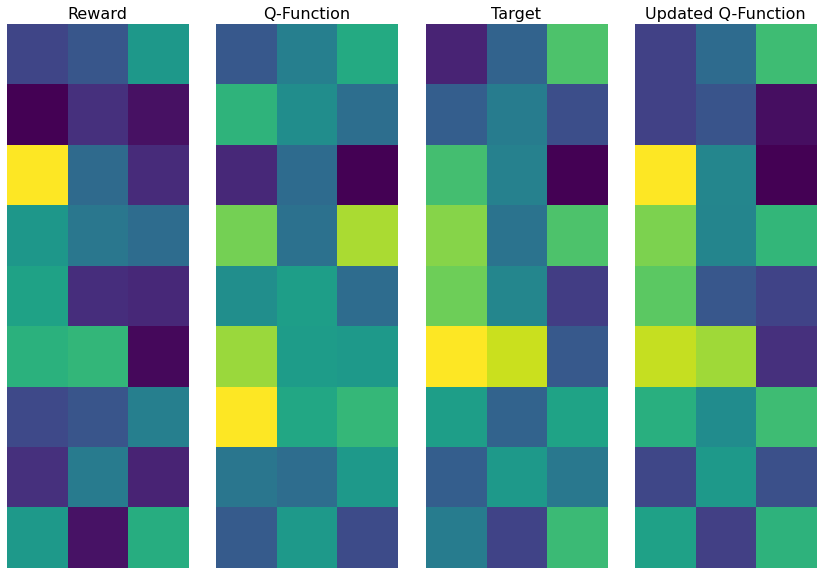

tf.Tensor(
[ 1.0238174  -2.3975704   2.0498514   1.7485421   0.36192402 -1.0864521
 -1.1870518   2.4379303   2.2072296   0.1034148   1.5910025   2.322036
  2.271971    2.4773636   0.6646931   2.496652   -0.35851285  2.465819
  2.467505    2.0245867   0.857018    2.483383   -0.3900259   0.02415863
  2.270045    0.77224594  0.7682525   1.9162097   0.3187542   1.6634598
 -1.0204098  -0.9354952   1.014137    2.1653473   0.01043546 -0.3864736
 -0.81927556  2.0917315   1.2301053 ], shape=(39,), dtype=float32)
loss 14194.878 reward 13.797636
tf.Tensor(
[ 0.770296   -2.895532    2.5496788   2.2484229  -0.13767487 -0.9608612
 -1.1437893   2.8052688   2.6973877  -0.39627126  1.0966623   2.1959596
  2.0339086   2.9705997   0.2600099   2.9866607  -0.8256157   2.9598494
  2.9674928   2.0971699   0.38492146  2.9799154  -0.84666455 -0.4734339
  2.3705242   0.27870193  0.28920433  1.6747631   0.8099321   1.6407611
 -1.5156931  -1.4354885   0.5204308   2.1518633   0.5091745  -0.880198
 -1.3189722   1.6

tf.Tensor(
[ 5.913404   -8.452429    9.505758    9.248407   -3.6841884   5.9844418
  5.6642466  -1.6101989  -1.2988698  -5.8557196  -2.8936703   1.626014
 -4.945503    9.94092    -6.728945   -1.45469    -6.019033    1.6076796
  9.967491    0.64454854  0.18059385  3.106172    2.4158895  -7.473137
 -4.321995   -5.063439    1.959475   -5.2733746   7.807105   -4.937937
 -8.514151   -5.6690235   1.493927    3.5484462   7.4249253  -5.003576
 -3.2575989  -5.317506   -1.4128947 ], shape=(39,), dtype=float32)
loss 895189.3 reward 134.68948
The Objective Value 1082.0
tf.Tensor(
[ 0.27450272 -0.468712   -0.23714237  0.08113994  0.29686537  0.23195691
 -0.2357221  -0.4026285   0.49510145  0.43721494  0.27811384  0.27798548
  0.20325808 -0.35472032  0.40692502  0.49635354  0.36993057  0.21337934
  0.22460389  0.33611527  0.29886952 -0.01669321  0.13058253  0.49785683
  0.4610446   0.4826417   0.37055388  0.09489985  0.15529676  0.33568594
  0.06141081  0.49836007 -0.45086414  0.4206067   0.4934658 

loss 316366.2 reward 80.88973
tf.Tensor(
[ 2.7982724  -0.6196537  -6.5661125   6.9409094  -4.8837366   6.671094
 -3.0855498   1.4894133   7.945623   -4.0789747  -4.633405   -4.5785093
 -6.05007     3.442916   -5.119516    4.8213787  -4.540381   -3.8491488
 -2.6993327   5.440143   -3.2874436  -6.8257446  -5.6587663  -2.983601
  3.7374778   6.87362    -5.2750816   0.35534382  2.3252785  -2.4402468
  3.43379     6.0801554  -7.457798   -4.188949    7.3210096   1.7591242
  4.1702127  -2.2214499   7.712615  ], shape=(39,), dtype=float32)
loss 385474.5 reward 89.45334
tf.Tensor(
[ 3.2982724  -0.1196537  -7.0661125   7.4381633  -5.3836303   6.7389936
 -2.5855498   1.9894133   8.046541   -4.5789747  -5.1334033  -5.0785093
 -6.55007     3.9410334  -5.619516    5.3209796  -5.036133   -4.3491488
 -3.1993327   5.9401383  -2.7874477  -7.3257446  -6.1587663  -3.4830403
  4.237478    7.37362    -5.775078   -0.14465609  1.8252785  -2.3522184
  3.93379     6.5801554  -7.011437   -4.688064    7.818787   

In [ ]:

for _y in range(5):
    seed=10
    for _a in range(200):
    
        for _b in range(1):
            model.init_block(seed=seed,shuffle_bundles=True)
            for _c in range(20):
                stopping_cond = model.batch_train(move_num=_c)
                if stopping_cond==0:
                    break
        seed+=1
    
    
#     model.init_block(seed=2)
#     for _ in range(10):
#         stopping_cond = model.batch_train()
#         if stopping_cond==0:
#             break
#     model.init_block(seed=1)
#     for _ in range(30):
#         model.batch_train()
        
#     model.init_block(seed=3)
#     for _ in range(20):
#         model.batch_train()
        
#     model.init_block(seed=4)
#     for _ in range(20):
#         model.batch_train()

In [30]:

model.model.save_weights('saved_models/mip_v1_wgts')

In [ ]:
z_bun_lkup_backup.shape

model.block.bundle_availability

In [367]:
# model.init_block(seed=1)
z_bun_lkup_backup,z_ava_bun_backup,z_cur_inventory_backup,z_proba_backup = model.get_states()
z_proba_backup

ValueError: too many values to unpack (expected 4)

In [134]:
q_proba  = z_proba_backup
q_proba = tf.squeeze(q_proba)
cur_inventory = model.block.call(q_proba,training=False)

In [138]:
model.block.target

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[26., 37., 38., 14., 10., 17., 16.,  8., 21.,  4.,  3., 16., 45.,
        42., 37., 12.,  7.,  9., 28., 24., 26., 37., 29., 45., 49., 36.,
        46.]], dtype=float32)>

In [137]:
tf.reshape(cur_inventory,(3,-1))

<tf.Tensor: shape=(3, 9), dtype=float32, numpy=
array([[-30.550491 , -11.449804 , -43.230404 , -98.27658  , -56.970093 ,
        -42.72441  ,  49.271088 ,  51.88796  ,  86.9891   ],
       [ 55.4802   ,  41.43519  ,  13.639408 ,  76.63133  , 116.90954  ,
        132.1503   ,  52.439507 ,  26.727262 ,  80.062454 ],
       [ -8.2399645, -13.835058 , -46.898087 , -78.752785 , -94.79282  ,
        -76.16816  , -33.326187 , -66.2751   , -80.6266   ]],
      dtype=float32)>

In [129]:
z_ava_bun_backup

<tf.Tensor: shape=(1, 13), dtype=float32, numpy=
array([[12.692818 ,  9.968993 , 18.737873 ,  8.920593 , 10.714317 ,
         4.5712514, 24.793142 , 17.769758 ,  6.02512  ,  9.513994 ,
         8.371048 , 14.152736 , 15.098622 ]], dtype=float32)>

In [ ]:
# bias from target - (proposal+OH)
# correlation between MIP solutions and RL   

In [26]:
model.init_block(seed=3)
z_bun_lkup_backup = model.block.get_bun_sku()
z_ava_bun_backup = model.block.get_ava_bun()
z_cur_inventory_backup = model.block.get_cur_inv()
z_shop_bundle_alloc_backup = model.block.get_shop_bun_alloc()
z_proba_backup = model.block.get_shop_bun_proba()

q_proba  = z_proba_backup
print(z_ava_bun_backup)
for _ in range(20):
    z_bun_lkup = model.block.get_bun_sku()
    z_ava_bun = model.block.get_ava_bun()
    z_cur_inventory = model.block.get_cur_inv()
    z_shop_bundle_alloc = model.block.get_shop_bun_alloc()
    z_proba = model.block.get_shop_bun_proba()
    #caculate the next state without training model
    proba_update = model.model([tf.cast(z_bun_lkup,tf.float32),
                                         tf.cast(z_ava_bun,tf.float32),
                                         tf.cast(z_cur_inventory,tf.float32),
                                         tf.cast(z_shop_bundle_alloc,tf.float32),
                                         tf.cast(z_proba,tf.float32)],training=False)
    proba_update=tf.clip_by_value(tf.squeeze(proba_update),-1.,1.)
    
    q_proba=tf.squeeze(z_proba)+1e-1*proba_update#tf.clip_by_value(tf.squeeze(z_proba)+1e-3*proba_update,-1,1)
    print(z_ava_bun)
    cur_inventory = model.block.call(q_proba,training=True)
    
    
#     q_proba = tf.reshape(q_proba,[1,-1])


#     if tf.reduce_sum(tf.cast(z_ava_bun_backup<-3,tf.float32)):
#         print(z_ava_bun_backup)
#         print('stopping, no available bundles')
#         break


#     if tf.reduce_sum(tf.cast(z_cur_inventory_backup<-3,tf.float32)):
#         print('stopping, negative inventory')
#         break

    shop_bundle_df = pd.DataFrame(columns=('shop_id','bundle_id','mip_bundle_units','rl_bundle_units'))
    i=0
    for shop in model.block.shops:
        for bundle in model.block.bundles:
            shop_bundle_df.loc[i] = [shop,bundle,model.block.mip_shop_bundle[(shop,bundle)].numpy(),model.block.tf_alloc_shp_bun[(shop,bundle)].numpy()]
            i+=1


    print(abs(shop_bundle_df['mip_bundle_units']-shop_bundle_df['rl_bundle_units']).mean())
    print(shop_bundle_df[['mip_bundle_units','rl_bundle_units']].corr())

C:\Users\rohan\Anaconda3\envs\datasci\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


The Objective Value 1023.0
tf.Tensor([[13.  7. 12.  7.  6.  8. 18.  7.  9.  6.  7.  7. 12.]], shape=(1, 13), dtype=float32)
tf.Tensor([[13.  7. 12.  7.  6.  8. 18.  7.  9.  6.  7.  7. 12.]], shape=(1, 13), dtype=float32)
2.453846
                  mip_bundle_units  rl_bundle_units
mip_bundle_units               1.0              NaN
rl_bundle_units                NaN              NaN
tf.Tensor(
[[12.699999   6.7000003 11.699999   6.7000003  5.7000003  7.7000003
  17.699999   6.7000003  8.699999   5.7000003  6.7000003  6.7000003
  11.699999 ]], shape=(1, 13), dtype=float32)
2.4384615
                  mip_bundle_units  rl_bundle_units
mip_bundle_units               1.0              NaN
rl_bundle_units                NaN              NaN
tf.Tensor(
[[12.099999  6.100001 11.099999  6.100001  5.100001  7.100001 17.099997
   6.100001  8.099999  5.100001  6.100001  6.100001 11.099999]], shape=(1, 13), dtype=float32)
2.4153845
                  mip_bundle_units  rl_bundle_units
mip_bundle_unit

In [16]:
model.block.tf_alloc_shp_bun[(shop,bundle)].numpy()

0.1

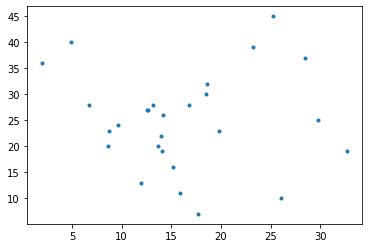

In [27]:
plt.plot(cur_inventory.numpy().flatten(),model.block.target.numpy().flatten(),'.')

In [28]:
model.block.bundle_availability,model.block.tf_avail_bundle,model.block.tf_alloc_shp_bun

({'1': 13,
  '2': 7,
  '3': 12,
  '4': 7,
  '5': 6,
  '6': 8,
  '7': 18,
  '8': 7,
  '9': 9,
  '10': 6,
  '11': 7,
  '12': 7,
  '13': 12},
 {'1': <tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
  '2': <tf.Tensor: shape=(), dtype=float32, numpy=3.7444215>,
  '3': <tf.Tensor: shape=(), dtype=float32, numpy=3.4039433>,
  '4': <tf.Tensor: shape=(), dtype=float32, numpy=2.5770907>,
  '5': <tf.Tensor: shape=(), dtype=float32, numpy=4.532837>,
  '6': <tf.Tensor: shape=(), dtype=float32, numpy=6.600001>,
  '7': <tf.Tensor: shape=(), dtype=float32, numpy=7.3999987>,
  '8': <tf.Tensor: shape=(), dtype=float32, numpy=5.8569527>,
  '9': <tf.Tensor: shape=(), dtype=float32, numpy=6.7340407>,
  '10': <tf.Tensor: shape=(), dtype=float32, numpy=0.79999954>,
  '11': <tf.Tensor: shape=(), dtype=float32, numpy=6.603085>,
  '12': <tf.Tensor: shape=(), dtype=float32, numpy=9.69571>,
  '13': <tf.Tensor: shape=(), dtype=float32, numpy=7.0353904>},
 {('1', '1'): <tf.Tensor: shape=(), dtype=float32, numpy=3.6

In [273]:
shop_bundle_df = pd.DataFrame(columns=('shop_id','bundle_id','mip_bundle_units','rl_bundle_units'))

i=0
for shop in model.block.shops:
    for bundle in model.block.bundles:
        shop_bundle_df.loc[i] = [shop,bundle,model.block.mip_shop_bundle[(shop,bundle)].numpy(),model.block.tf_alloc_shp_bun[(shop,bundle)].numpy()[0]]
        i+=1


shop_bundle_df[['mip_bundle_units','rl_bundle_units']].corr()

,mip_bundle_units,rl_bundle_units
mip_bundle_units,1.00000,0.14642
rl_bundle_units,0.14642,1.00000


In [274]:
shop_bundle_df[['mip_bundle_units','rl_bundle_units']]

,mip_bundle_units,rl_bundle_units
0,7.0,0.750000
1,1.0,0.750000
2,3.0,0.750000
3,0.0,0.750000
4,14.0,0.750000
5,0.0,0.750000
6,0.0,0.750000
7,10.0,0.750000
8,7.0,0.750000
9,1.0,0.750000


In [818]:
type(model.block.alloc_shp_bun[('1','1')])==tf.python.framework.ops.EagerTensor

True

In [654]:
z_bun_lkup_backup,z_ava_bun_backup,z_cur_inventory_backup,z_shop_bun_proba_backup = model.get_states()

model.block(tf.reshape(z_shop_bun_proba_backup,[-1,1]),training=False)

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[ 42.006073  ,  44.501274  ,  39.56399   ,  -6.613636  ,
         -5.8648357 ,  -7.7519836 ,  39.944504  ,  38.40349   ,
         41.617935  ,  43.624744  ,  42.59037   ,  44.669315  ,
         38.52914   ,  43.0463    ,  37.211     ,  42.514015  ,
         44.368904  ,  43.938225  ,   0.72561073,   2.7990055 ,
        -15.689171  ,  38.58704   ,  37.640587  ,  37.847088  ,
         -3.3561106 ,  -3.5135431 ,  -7.451309  ]], dtype=float32)>

In [657]:
z_ava_bun_backup

<tf.Tensor: shape=(1, 13), dtype=float32, numpy=
array([[ 30.       ,  12.684504 ,  10.55661  ,  10.424743 ,  -6.6970882,
         -5.162857 , -22.509373 ,  -2.1672878,  -3.8477821,  -2.3637257,
         -5.171816 ,  -6.015381 ,  -4.1693707]], dtype=float32)>

In [656]:
z_cur_inventory_backup

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[ 39.006073 ,  41.501274 ,  36.56399  ,  -5.613636 ,  -4.8648357,
         -6.751983 ,  36.944504 ,  35.40349  ,  38.617935 ,  40.624744 ,
         39.59037  ,  41.669315 ,  35.52914  ,  40.0463   ,  34.211    ,
         39.514015 ,  41.368904 ,  40.938225 ,   1.7256107,   3.7990055,
        -12.689171 ,  35.58704  ,  34.640587 ,  34.847088 ,  -2.3561106,
         -2.5135431,  -6.4513087]], dtype=float32)>

In [655]:
model.block.target

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[38., 40., 37.,  5.,  6.,  7., 33., 30., 40., 40., 37., 40., 34.,
        40., 31., 39., 39., 37., 14., 19., 11., 33., 32., 32., 12., 11.,
         6.]], dtype=float32)>

In [659]:
q_cur_inventory = model.block(proba_update.numpy(),training=False)

In [660]:
q_cur_inventory

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[ 39.328945  ,  42.76984   ,  37.88163   ,  -4.68814   ,
         -4.004463  ,  -5.8893    ,  39.955467  ,  38.41219   ,
         42.56997   ,  45.407833  ,  43.477192  ,  45.960827  ,
         37.84979   ,  42.2319    ,  36.970516  ,  40.877457  ,
         42.733765  ,  43.300728  ,   3.721553  ,   4.809765  ,
        -11.030989  ,  36.59176   ,  35.650078  ,  35.85198   ,
          0.19151339,   0.0793871 ,  -3.2538986 ]], dtype=float32)>

In [429]:
z_bun_lkup_backup,z_ava_bun_backup,z_cur_inventory_backup,z_shop_bun_proba_backup

(<tf.Tensor: shape=(1, 117), dtype=float32, numpy=
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 3., 3., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 13), dtype=float32, numpy=
 array([[ 9., 15., 16., 12., 13., 15.,  9.,  4.,  4.,  5., 16., 11., 17.]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 27), dtype=float32, numpy=
 array([[3.9724514e-02, 2.5262414e-02, 2.4580076e-01, 1.0219672e-01,
         2.3191391e-01, 9.2286342e-01, 9.8517412e-01, 9.7950912e-01,
         5.3988900e-03, 1.0753026e-03, 3.1837499e-01

In [22]:
# shop_id = sb_view['shop_id']

'1'

In [54]:
avail_bundle_num

16

In [57]:
avail_bundle_df

,bundle_id,avail_bundles,is_avail
0,1,10,1
1,2,16,1
2,3,17,1
3,4,13,1
4,5,14,1
5,6,16,1
6,7,10,1
7,8,5,1
8,9,5,1
9,10,6,1


In [78]:
shop_bundle_proba_df.bundle_id = shop_bundle_proba_df.bundle_id.astype(np.str)

In [79]:
avail_bundle_df.bundle_id = avail_bundle_df.bundle_id.astype(np.str)

In [73]:
shop_bundle_proba_df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38],
           dtype='int64')

In [116]:
test.avail_bundle_df

,bundle_id,avail_bundles
0,1,10
1,2,16
2,3,17
3,4,13
4,5,14
5,6,16
6,7,10
7,8,5
8,9,5
9,10,6


In [91]:
for i in range(100):

    avail_bundle_df['is_avail'] = (avail_bundle_df['avail_bundles']>0).astype(np.int)
    if avail_bundle_df['is_avail'].sum()==0:
        print('finished allocating')
        break
    avail_proba_df = avail_bundle_df[['bundle_id','is_avail']].merge(shop_bundle_proba_df,on=['bundle_id'])
    avail_proba_df.proba = avail_proba_df.proba*avail_proba_df.is_avail

    sb_view = avail_proba_df[avail_proba_df.proba==avail_proba_df.proba.max()]

    shop = sb_view[['shop_id']].values[0][0]
    bundle = sb_view[['bundle_id']].values[0][0]


    avail_bundle_num = avail_bundle_df.loc[avail_bundle_df.bundle_id==bundle,'avail_bundles'].values[0]
    avail_bundle_df.loc[avail_bundle_df.bundle_id==bundle,'avail_bundles'] = avail_bundle_num-1

    sc_units = current_inventory[shop][style+color]

    for style in styles:
        for color in colors:
            i = current_inventory_df[(current_inventory_df.shop_id==shop)& \
                                     (current_inventory_df['style']==style)& \
                                     (current_inventory_df['color']==color)
                                    ].index[0]
            sc_units = current_inventory_df.loc[i,'sc_units']
            print(sc_units)

            print(bundles_static[bundle][style+color] )
            sc_units += bundles_static[bundle][style+color] 
            print(sc_units)
            current_inventory_df.loc[i,'sc_units'] = sc_units

    #             updated_inventory_df.loc[i]=[shop,style,color,sc_units]
    #             i+=1

finished allocating


In [47]:

print()

12    17
Name: avail_bundles, dtype: object


In [32]:
style

'C'

In [35]:
 current_inventory_df[(current_inventory_df.shop_id==shop)&(current_inventory_df['style']==style)]

,shop_id,style,color,sc_units
6,1,C,R,4
7,1,C,B,2
8,1,C,G,4
